# Introduction

In this simple project, there are two datasets used as follows:

1. Tokyo Olympics Medal Tally
2. Median Income by Country

The main goal of this project is to create some visualizations and get insights from both dataset.

Here are several problem statements of this project:
1. Did countries that win more total medals also won more gold medals?
2. What are the top 10 countries in the Tokyo Olympic Games?
3. How is the medals comparison (Gold vs. Silver vs. Bronze) of a specific country?
4. Does the median annual income of a country affect the country's total medals in Tokyo Olympics?
5. Does the population of a country affect the country's total medals in Tokyo Olympics?

# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# Load Olympic Medals Dataset

In [2]:
# load medals by country data
medals = pd.read_csv('../input/2021-olympics-medals-in-tokyo/Tokyo Medals 2021.csv')
medals.head(15)

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
0,United States of America,39,41,33,113,1
1,People's Republic of China,38,32,18,88,2
2,Japan,27,14,17,58,5
3,Great Britain,22,21,22,65,4
4,ROC,20,28,23,71,3
5,Australia,17,7,22,46,6
6,Netherlands,10,12,14,36,9
7,France,10,12,11,33,10
8,Germany,10,11,16,37,8
9,Italy,10,10,20,40,7


In [3]:
medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country        93 non-null     object
 1   Gold Medal     93 non-null     int64 
 2   Silver Medal   93 non-null     int64 
 3   Bronze Medal   93 non-null     int64 
 4   Total          93 non-null     int64 
 5   Rank By Total  93 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 4.5+ KB


In [4]:
medals.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gold Medal,93.0,3.655914,7.022471,0.0,0.0,1.0,3.0,39.0
Silver Medal,93.0,3.634409,6.626339,0.0,0.0,1.0,4.0,41.0
Bronze Medal,93.0,4.322581,6.210372,0.0,1.0,2.0,5.0,33.0
Total,93.0,11.612903,19.091332,1.0,2.0,4.0,11.0,113.0
Rank By Total,93.0,43.494624,24.171769,1.0,23.0,47.0,66.0,77.0


# Simplify Country Name

In [5]:
medals.loc[medals['Country'] == "People's Republic of China", 'Country'] = 'China'
medals.loc[medals['Country'] == 'United States of America', 'Country'] = 'USA'

# Total Medals vs. Gold Medals

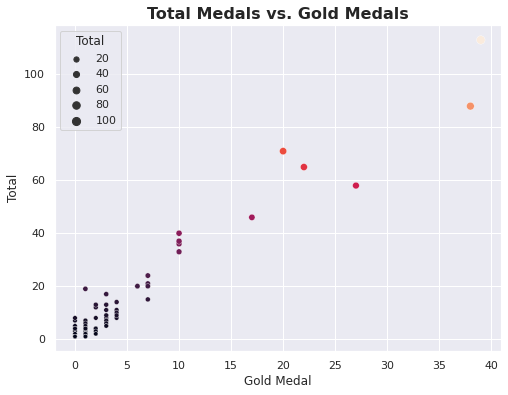

In [6]:
plt.figure(figsize = (8, 6))
sns.scatterplot(x = medals['Gold Medal'], y = medals['Total'], c = medals['Total'], size = medals['Total'])
# sns.lmplot(x = 'Gold Medal', y = 'Total', data = medals)
plt.title('Total Medals vs. Gold Medals', fontsize = 16, fontweight = 'bold')
plt.show()

In [7]:
def get_correlation(series_1, series_2, method):
    return series_1.corr(series_2, method = method)

correlations = {}
for method in ['pearson', 'spearman', 'kendall']:
    correlations[method] = get_correlation(medals['Gold Medal'], medals['Total'], method)
    
correlations

{'pearson': 0.9708395529064432,
 'spearman': 0.8149798086302957,
 'kendall': 0.7078239342603573}

In [8]:
pd.DataFrame(correlations, index = ['score'])

,pearson,spearman,kendall
score,0.97084,0.81498,0.707824


# Top 10 by Gold Medals

In [9]:
top10_gold = medals.head(10)

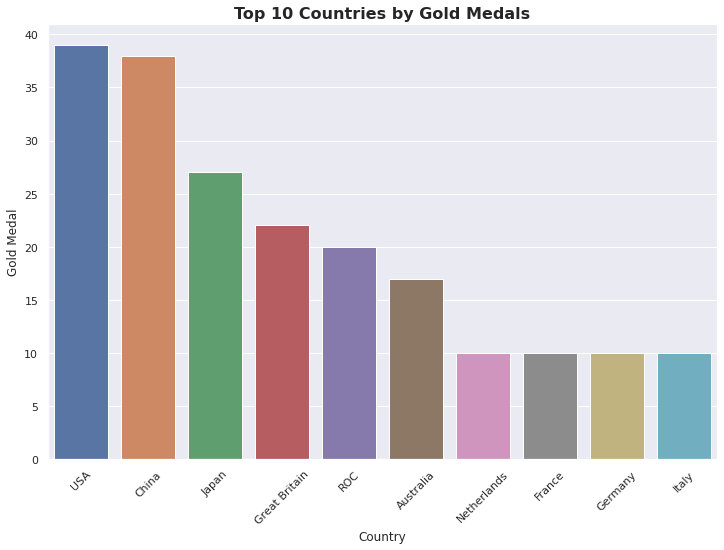

In [10]:
plt.figure(figsize = (12, 8))
sns.barplot(x = top10_gold['Country'], y = top10_gold['Gold Medal'])
plt.title('Top 10 Countries by Gold Medals', fontsize = 16, fontweight = 'bold')
plt.xticks(rotation = 45)
plt.show()

# Top 10 by Total Medals

In [11]:
top10_total = medals.sort_values('Total', ascending = False).head(10)

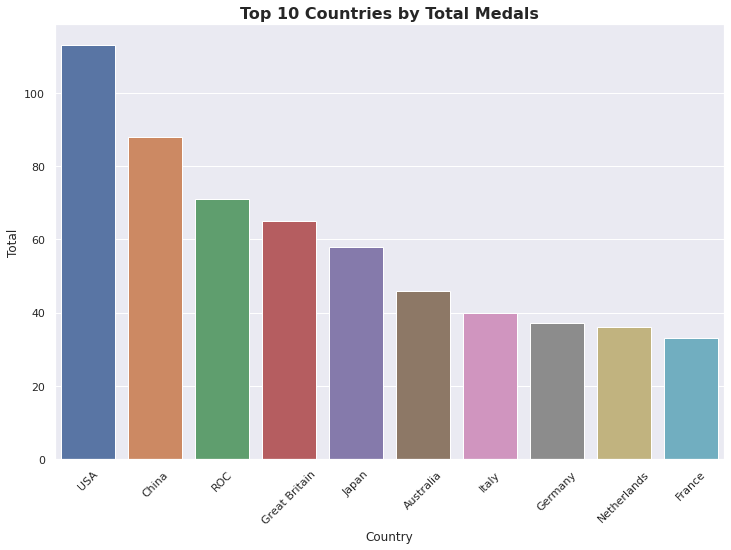

In [12]:
plt.figure(figsize = (12, 8))
sns.barplot(x = top10_total['Country'], y = top10_total['Total'])
plt.title('Top 10 Countries by Total Medals', fontsize = 16, fontweight = 'bold')
plt.xticks(rotation = 45)
plt.show()

# Functions to Compare Country Medals
#### 1. count_medals() --> function to get the number of medals according to a specific country and medal color
#### 2. get_values() --> function to get the values needed for plotting
#### 3. compare_country_medals() --> function to create pie and bar plot of comparison

In [13]:
def count_medals(country, colour):
    return int(country.loc[:, colour].values)

def get_values(country_name):
    country = medals[medals['Country'] == country_name]
    labels = ['Gold', 'Silver', 'Bronze']
    medal_numbers = [count_medals(country, 'Gold Medal'), 
                     count_medals(country, 'Silver Medal'), 
                     count_medals(country, 'Bronze Medal')]
    colors = ['#FFD700', '#C0C0C0', '#CD7F32'] # gold, silver, bronze
    return country, labels, medal_numbers, colors
    
def compare_country_medals(country_name):
    country, labels, medal_numbers, colors = get_values(country_name)
    
    fig, ax = plt.subplots(1, 2, figsize = (12, 6))
    fig.suptitle('Medals of ' + country_name, fontsize = 'xx-large', fontweight = 'bold')
    # pie
    ax[0].pie(medal_numbers, labels = labels, colors = colors, autopct = '%.1f%%', explode = [0.1, 0, 0], shadow = True)
    ax[0].set_title('Pie Chart', color = 'red', fontsize = 15, fontweight = 'bold')
    # bar
    ax[1].bar(x = labels, height = medal_numbers, color = colors)
    ax[1].set_title('Bar Chart', color = 'red', fontsize = 15, fontweight = 'bold')
    ax[1].set_xlabel('Medal Color')
    ax[1].set_ylabel('Count')
    plt.show()

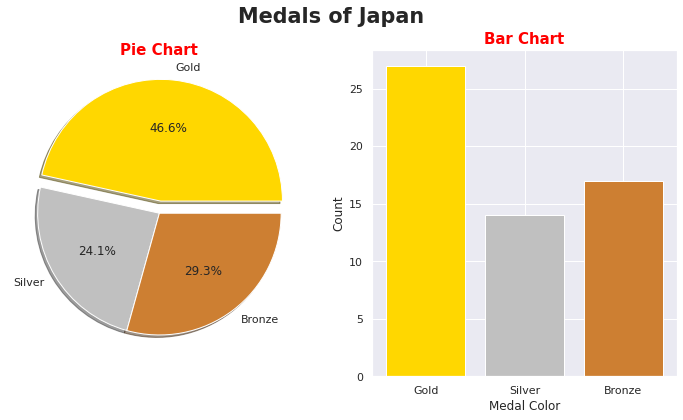

In [14]:
compare_country_medals('Japan')

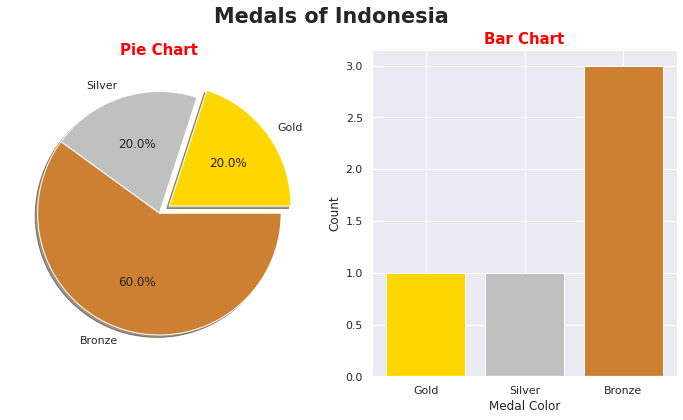

In [15]:
compare_country_medals('Indonesia')

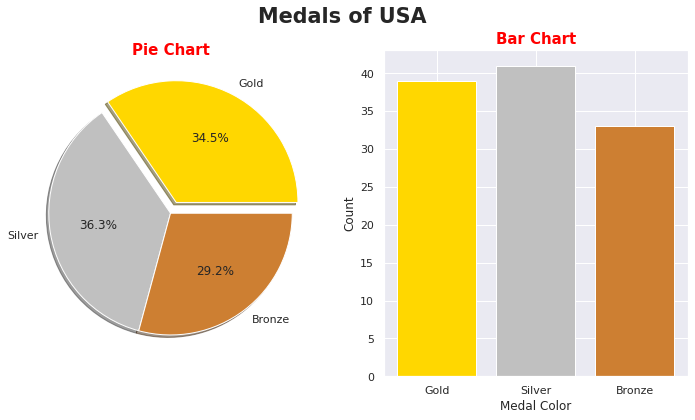

In [16]:
compare_country_medals('USA')

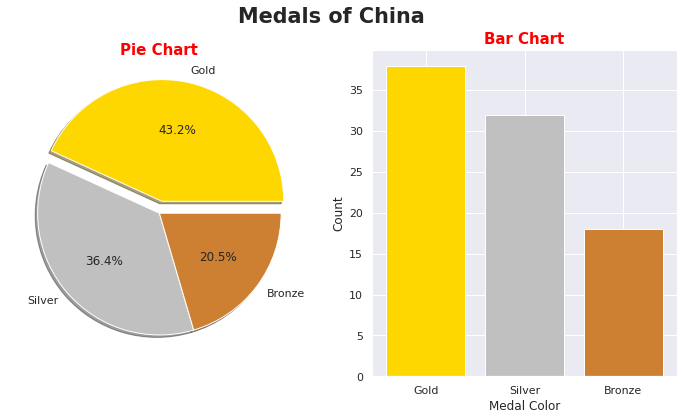

In [17]:
compare_country_medals('China')

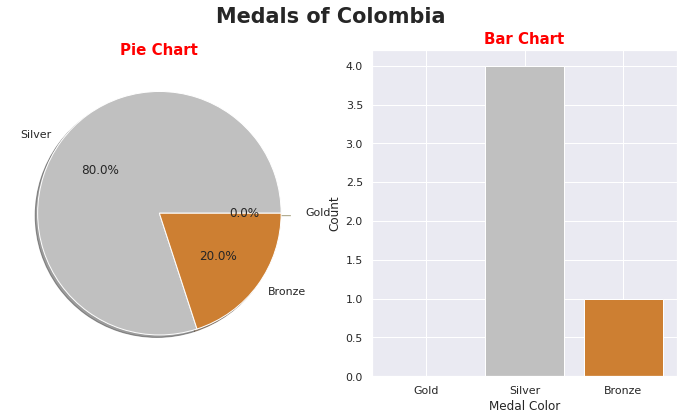

In [18]:
compare_country_medals('Colombia')

# Load Dataset Consisting of Median Income and Population

In [19]:
# load median income by country data
income = pd.read_csv('../input/median-income-by-country-2021/medianincome.csv')
income.head()

,country,medianHouseholdIncome,medianPerCapitaIncome,medianAnnualIncome,pop2021
0,Luxembourg,52493.0,18418.0,73910.0,634.814
1,Norway,51489.0,19308.0,82500.0,5465.630
2,Sweden,50514.0,18632.0,55840.0,10160.169
3,Australia,46555.0,15026.0,54910.0,25788.215
4,Denmark,44360.0,18262.0,63240.0,5813.298


In [20]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                138 non-null    object 
 1   medianHouseholdIncome  130 non-null    float64
 2   medianPerCapitaIncome  130 non-null    float64
 3   medianAnnualIncome     76 non-null     float64
 4   pop2021                138 non-null    float64
dtypes: float64(4), object(1)
memory usage: 5.5+ KB


In [21]:
income.sort_values('medianAnnualIncome', ascending = False, inplace = True)
income.reset_index(inplace = True)
income.head()

,index,country,medianHouseholdIncome,medianPerCapitaIncome,medianAnnualIncome,pop2021
0,131,Monaco,NaN,NaN,186080.0,39.511
1,130,Liechtenstein,NaN,NaN,116430.0,38.250
2,132,Bermuda,NaN,NaN,106140.0,62.090
3,135,Switzerland,NaN,NaN,85500.0,8715.494
4,1,Norway,51489.0,19308.0,82500.0,5465.630


# Tidying Columns and Column Names

In [22]:
income.columns = ['Index', 'Country', 'Median Household Income', 'Median Per Capita Income', 
                  'Median Annual Income', 'Population']
income.drop('Index', axis = 1, inplace = True)
income.head()

,Country,Median Household Income,Median Per Capita Income,Median Annual Income,Population
0,Monaco,NaN,NaN,186080.0,39.511
1,Liechtenstein,NaN,NaN,116430.0,38.250
2,Bermuda,NaN,NaN,106140.0,62.090
3,Switzerland,NaN,NaN,85500.0,8715.494
4,Norway,51489.0,19308.0,82500.0,5465.630


# Simplify Column Names

In [23]:
income.loc[income['Country'] == 'United States', 'Country'] = 'USA'

# Check the Intersection of Two Datasets
#### There are 72 countries that exist in income dataset that participate in Olympics.

In [24]:
income['Country'].isin(medals['Country']).sum()

72

# Combine Medals and Income Dataset

In [25]:
combined_df = pd.merge(medals, income, how = 'inner')
combined_df.head()

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total,Median Household Income,Median Per Capita Income,Median Annual Income,Population
0,USA,39,41,33,113,1,43585.0,15480.0,65760.0,332915.073
1,China,38,32,18,88,2,6180.0,1786.0,10410.0,1444216.107
2,Japan,27,14,17,58,5,33822.0,10840.0,41690.0,126050.804
3,Australia,17,7,22,46,6,46555.0,15026.0,54910.0,25788.215
4,Netherlands,10,12,14,36,9,38584.0,14450.0,53200.0,17173.099


# Extract Relevant Columns
#### We would like to see if there is a strong relationship between total medals and income / population.

In [26]:
df = combined_df[['Country', 'Total', 'Median Annual Income', 'Population']]
df.head(20)

,Country,Total,Median Annual Income,Population
0,USA,113,65760.0,332915.073
1,China,88,10410.0,1444216.107
2,Japan,58,41690.0,126050.804
3,Australia,46,54910.0,25788.215
4,Netherlands,36,53200.0,17173.099
5,France,33,42400.0,65426.179
6,Germany,37,48520.0,83900.473
7,Italy,40,34460.0,60367.477
8,Canada,24,46370.0,38067.903
9,Brazil,21,9130.0,213993.437


# Total Medals vs. Median Annual Income

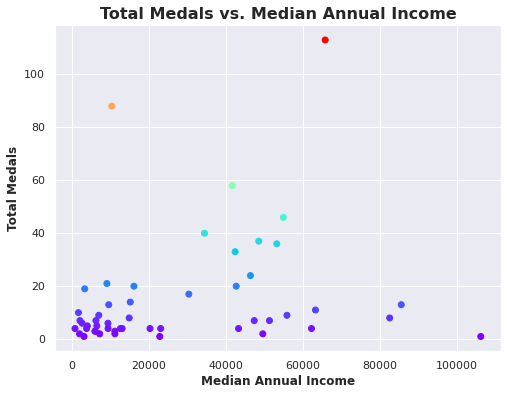

In [27]:
plt.figure(figsize = (8, 6))
plt.scatter(x = df['Median Annual Income'], y = df['Total'], c = df['Total'], cmap = 'rainbow')
plt.title('Total Medals vs. Median Annual Income', fontsize = 16, fontweight = 'bold')
plt.xlabel('Median Annual Income', fontweight = 'bold')
plt.ylabel('Total Medals', fontweight = 'bold')
plt.show()

There is a positive relationship between median annual income and total medals, but it is not significant.

In [28]:
get_correlation(df['Total'], df['Median Annual Income'], 'pearson')

0.25091812997124

# Total Medals vs. Population

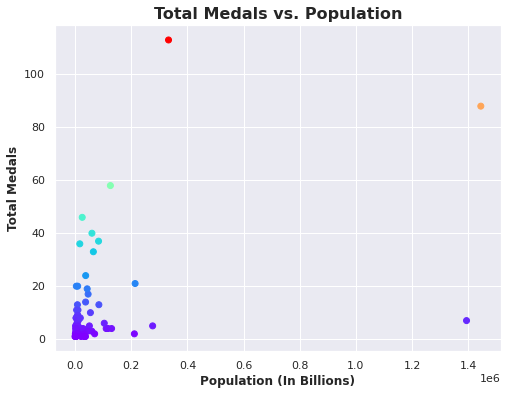

In [29]:
plt.figure(figsize = (8, 6))
plt.scatter(x = df['Population'], y = df['Total'], c = df['Total'], cmap = 'rainbow')
plt.title('Total Medals vs. Population', fontsize = 16, fontweight = 'bold')
plt.xlabel('Population (In Billions)', fontweight = 'bold')
plt.ylabel('Total Medals', fontweight = 'bold')
plt.show()

### Zoom In

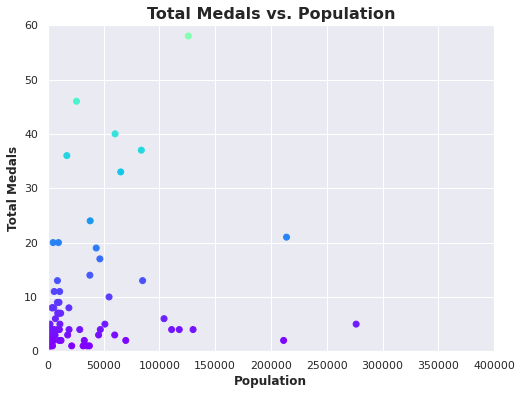

In [30]:
plt.figure(figsize = (8, 6))
plt.scatter(x = df['Population'], y = df['Total'], c = df['Total'], cmap = 'rainbow')
plt.title('Total Medals vs. Population', fontsize = 16, fontweight = 'bold')
plt.xlabel('Population', fontweight = 'bold')
plt.ylabel('Total Medals', fontweight = 'bold')

# set axis limits to zoom in
plt.xlim((0, 0.4e6))
plt.ylim((0, 60))
plt.show()

The Pearson's Correlation is about 0.44, so we can conclude that population gives a more significant impact than median annual income to total medals. 

However it is not a really strong relationship, since some populated countries like India and Indonesia are not even in the top table, meanwhile countries like Australia and The Netherlands which are not really populated, get into the top 10. 

In [31]:
get_correlation(df['Total'], df['Population'], 'pearson')

0.4351195846380564